In [ ]:
import torch 
import matplotlib.pyplot as plt 
import numpy as np  
import argparse 
import pickle  
import os 
from torchvision import transforms  
from PIL import Image 



In [ ]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.6-py2.py3-none-any.whl size=13629 sha256=ab2a39bc1563d3b15e4e985f831fac55d0a57acb3a27c78264548df490ed1ec4
  Stored in directory: /root/.cache/pip/wheels/ee/71/72/b98430261d849ae631e283dfc7ccb456a3fb2ed2205714b63f
Successfully built pytesseract


In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 12 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,664 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
import pytesseract

In [ ]:
!wget "https://img.buzzfeed.com/buzzfeed-static/static/2017-03/21/7/asset/buzzfeed-prod-fastlane-02/sub-buzz-668-1490096330-22.jpg"

--2020-11-12 03:29:08--  https://img.buzzfeed.com/buzzfeed-static/static/2017-03/21/7/asset/buzzfeed-prod-fastlane-02/sub-buzz-668-1490096330-22.jpg
Resolving img.buzzfeed.com (img.buzzfeed.com)... 151.101.2.114, 151.101.66.114, 151.101.130.114, ...
Connecting to img.buzzfeed.com (img.buzzfeed.com)|151.101.2.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111682 (109K) [image/jpeg]
Saving to: ‘sub-buzz-668-1490096330-22.jpg’

sub-buzz-668-149009 100%[===================>] 109.06K  --.-KB/s    in 0.03s   

2020-11-12 03:29:08 (3.52 MB/s) - ‘sub-buzz-668-1490096330-22.jpg’ saved [111682/111682]



In [ ]:
print(pytesseract.image_to_string(Image.open('/content/4f6e4542de9c4bbfd9e69b560393444b.jpg')))

when you look good and someone
mentions it and you feel good

 



In [ ]:
ocr2=pytesseract.image_to_string(Image.open('/content/4f6e4542de9c4bbfd9e69b560393444b.jpg'))

In [ ]:
pip install pickle-mixin

  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-cp36-none-any.whl size=6000 sha256=a2a8a758dbe679f5cf94342b66a3699fbbe395d5562334c5259b7ddf04ea231e
  Stored in directory: /root/.cache/pip/wheels/cd/05/42/71de70fa36b9cbb7657bb5793a16f8028c1cdc1bdd3b8e1ac3
Successfully built pickle-mixin


In [ ]:
!wget https://zibwall.files.wordpress.com/2014/08/funny-faces-mr-bean-memes-6.jpg

--2020-11-05 02:19:07--  https://zibwall.files.wordpress.com/2014/08/funny-faces-mr-bean-memes-6.jpg
Resolving zibwall.files.wordpress.com (zibwall.files.wordpress.com)... 192.0.72.28, 192.0.72.29
Connecting to zibwall.files.wordpress.com (zibwall.files.wordpress.com)|192.0.72.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10065 (9.8K) [image/jpeg]
Saving to: ‘funny-faces-mr-bean-memes-6.jpg.1’

funny-faces-mr-bean 100%[===================>]   9.83K  --.-KB/s    in 0s      

2020-11-05 02:19:07 (216 MB/s) - ‘funny-faces-mr-bean-memes-6.jpg.1’ saved [10065/10065]



In [ ]:
!wget https://www.liveabout.com/thmb/hscG6lGOZeu4SFqvOqtE0C_2XZs=/837x640/filters:no_upscale():max_bytes(150000):strip_icc()/BFF27-5ac2f4b38023b9003671cb46.jpg

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `wget https://www.liveabout.com/thmb/hscG6lGOZeu4SFqvOqtE0C_2XZs=/837x640/filters:no_upscale():max_bytes(150000):strip_icc()/BFF27-5ac2f4b38023b9003671cb46.jpg'


In [ ]:
ENCODER_PATH = '/content/encoder-5-3000.pkl' 
DECODER_PATH = '/content/decoder-5-3000.pkl'
VOCAB_PATH =   '/content/vocab.pkl'
  
EMBED_SIZE = 256
HIDDEN_SIZE = 512
NUM_LAYERS = 1

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  
def load_image(image_path, transform=None):  
  image = Image.open(image_path) 
  #image=np.array(image)
  #if(image.shape[2]==4):
    #image=image[:][:][:3]
    #image=Image.fromarray(np.uint8(image))
  image = image.resize([224, 224], Image.LANCZOS) 
  if transform is not None: 
    image = transform(image).unsqueeze(0) 
  return image

In [ ]:
def PretrainedResNet(image_path, encoder_path=ENCODER_PATH,  
                     decoder_path=DECODER_PATH, 
                     vocab_path=VOCAB_PATH, 
                     embed_size=EMBED_SIZE, 
                     hidden_size=HIDDEN_SIZE, 
                     num_layers=NUM_LAYERS): 
  
    
    transform = transforms.Compose([ 
                transforms.ToTensor(),  
                transforms.Normalize((0.485, 0.456, 0.406),  
                                     (0.229, 0.224, 0.225))]) 
        
    
    with open(vocab_path, 'rb') as f: 
        vocab = pickle.load(f) 
  
    
  
    # eval mode (batchnorm uses moving mean/variance) 
    encoder = EncoderCNN(embed_size).eval()   
    decoder = DecoderRNN(embed_size, hidden_size, 
                          len(vocab), num_layers) 
  
    encoder = encoder.to(device) 
    decoder = decoder.to(device) 
  
    
    encoder.load_state_dict(torch.load(encoder_path)) 
    decoder.load_state_dict(torch.load(decoder_path)) 

    
    image = load_image(image_path, transform) 
    image_tensor = image.to(device) 
      
    feature = encoder(image_tensor) 
    sampled_ids = decoder.sample(feature) 
  
    sampled_ids = sampled_ids[0].cpu().numpy()          
      
    sampled_caption = [] 
    for word_id in sampled_ids: 
        word = vocab.idx2word[word_id] 
        sampled_caption.append(word) 
        if word == '<end>': 
            break
    sentence = ' '.join(sampled_caption)[8:-5].title()  
  
    image = Image.open(image_path) 
    return sentence,image

In [ ]:
!wget "https://drive.google.com/file/d/1EV61z5FdWnzezG6U1Nup7m5VfW7xPUVY"

--2020-11-12 03:45:32--  https://drive.google.com/file/d/1EV61z5FdWnzezG6U1Nup7m5VfW7xPUVY
Resolving drive.google.com (drive.google.com)... 172.217.204.102, 172.217.204.113, 172.217.204.100, ...
Connecting to drive.google.com (drive.google.com)|172.217.204.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://drive.google.com/file/d/1EV61z5FdWnzezG6U1Nup7m5VfW7xPUVY/ [following]
--2020-11-12 03:45:32--  https://drive.google.com/file/d/1EV61z5FdWnzezG6U1Nup7m5VfW7xPUVY/
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://drive.google.com/file/d/1EV61z5FdWnzezG6U1Nup7m5VfW7xPUVY/edit [following]
--2020-11-12 03:45:32--  https://drive.google.com/file/d/1EV61z5FdWnzezG6U1Nup7m5VfW7xPUVY/edit
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘1EV61z5FdWnzezG6U1Nup7m5VfW7x

In [ ]:
pip install gdown

In [ ]:
!gdown --id 1EV61z5FdWnzezG6U1Nup7m5VfW7xPUVY

Downloading...
From: https://drive.google.com/uc?id=1EV61z5FdWnzezG6U1Nup7m5VfW7xPUVY
To: /content/decoder-5-3000.pkl
36.9MB [00:00, 140MB/s] 


In [ ]:
!gdown --id 1oLHalPIRIgDV0bW1Yex1SLKDSRbn6-gG

Downloading...
From: https://drive.google.com/uc?id=1oLHalPIRIgDV0bW1Yex1SLKDSRbn6-gG
To: /content/encoder-5-3000.pkl
235MB [00:02, 107MB/s]


In [ ]:
!wget https://i.barkpost.com/wp-content/uploads/2015/02/featmeme.jpg

--2020-11-05 02:19:23--  https://i.barkpost.com/wp-content/uploads/2015/02/featmeme.jpg
Resolving i.barkpost.com (i.barkpost.com)... 172.67.29.37, 104.22.37.153, 104.22.36.153, ...
Connecting to i.barkpost.com (i.barkpost.com)|172.67.29.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151538 (148K) [image/jpeg]
Saving to: ‘featmeme.jpg’

featmeme.jpg        100%[===================>] 147.99K  --.-KB/s    in 0.02s   

2020-11-05 02:19:23 (9.60 MB/s) - ‘featmeme.jpg’ saved [151538/151538]



In [ ]:
!gdown --id 1kUwrv1jp9PdHFCP9dWys2c38Z6vInEG0

Downloading...
From: https://drive.google.com/uc?id=1kUwrv1jp9PdHFCP9dWys2c38Z6vInEG0
To: /content/vocab.pkl
100% 360k/360k [00:00<00:00, 48.3MB/s]


In [ ]:
!gdown --id 1iAVOW8wgbarroLLbuiB8L56FpBL4oQhQ

Permission denied: https://drive.google.com/uc?id=1iAVOW8wgbarroLLbuiB8L56FpBL4oQhQ
Maybe you need to change permission over 'Anyone with the link'?


In [ ]:
!wget https://i.redd.it/uyrdtpig1o831.jpg

--2020-11-05 02:19:25--  https://i.redd.it/uyrdtpig1o831.jpg
Resolving i.redd.it (i.redd.it)... 151.101.1.140, 151.101.65.140, 151.101.129.140, ...
Connecting to i.redd.it (i.redd.it)|151.101.1.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73645 (72K) [image/jpeg]
Saving to: ‘uyrdtpig1o831.jpg’

uyrdtpig1o831.jpg   100%[===================>]  71.92K  --.-KB/s    in 0.02s   

2020-11-05 02:19:25 (4.20 MB/s) - ‘uyrdtpig1o831.jpg’ saved [73645/73645]



In [ ]:
!wget https://grandjurytarget.files.wordpress.com/2015/06/friends-tv-show.jpg

--2020-10-29 07:34:29--  https://grandjurytarget.files.wordpress.com/2015/06/friends-tv-show.jpg
Resolving grandjurytarget.files.wordpress.com (grandjurytarget.files.wordpress.com)... 192.0.72.26, 192.0.72.27
Connecting to grandjurytarget.files.wordpress.com (grandjurytarget.files.wordpress.com)|192.0.72.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34616 (34K) [image/jpeg]
Saving to: ‘friends-tv-show.jpg’

friends-tv-show.jpg 100%[===================>]  33.80K  --.-KB/s    in 0.005s  

2020-10-29 07:34:30 (7.13 MB/s) - ‘friends-tv-show.jpg’ saved [34616/34616]



In [ ]:
import nltk
import pickle
import argparse
from collections import Counter
from pycocotools.coco import COCO


class Vocabulary(object):
    def __init__(self):
        self.word2idx = {}
        self.idx2word = {}
        self.idx = 0

    def add_word(self, word):
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            self.idx += 1

    def __call__(self, word):
        if not word in self.word2idx:
            return self.word2idx['<unk>']
        return self.word2idx[word]

    def __len__(self):
        return len(self.word2idx)

def build_vocab(json, threshold):
    """Build a simple vocabulary wrapper."""
    coco = COCO(json)
    counter = Counter()
    ids = coco.anns.keys()
    for i, id in enumerate(ids):
        caption = str(coco.anns[id]['caption'])
        tokens = nltk.tokenize.word_tokenize(caption.lower())
        counter.update(tokens)

        if (i+1) % 1000 == 0:
            print("[{}/{}] Tokenized the captions.".format(i+1, len(ids)))

    # If the word frequency is less than 'threshold', then the word is discarded.
    words = [word for word, cnt in counter.items() if cnt >= threshold]

    # Create a vocab wrapper and add some special tokens.
    vocab = Vocabulary()
    vocab.add_word('<pad>')
    vocab.add_word('<start>')
    vocab.add_word('<end>')
    vocab.add_word('<unk>')

    # Add the words to the vocabulary.
    for i, word in enumerate(words):
        vocab.add_word(word)
    return vocab

def main(args):
    vocab = build_vocab(json=args.caption_path, threshold=args.threshold)
    vocab_path = args.vocab_path
    with open(vocab_path, 'wb') as f:
        pickle.dump(vocab, f)
    print("Total vocabulary size: {}".format(len(vocab)))
    print("Saved the vocabulary wrapper to '{}'".format(vocab_path))




In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from torch.nn.utils.rnn import pack_padded_sequence


class EncoderCNN(nn.Module):
    def __init__(self, embed_size):
        super(EncoderCNN, self).__init__()
        resnet = models.resnet152(pretrained=True)
        modules = list(resnet.children())[:-1]
        self.resnet = nn.Sequential(*modules)
        self.linear = nn.Linear(resnet.fc.in_features, embed_size)
        self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)
        
    def forward(self, images):
        with torch.no_grad():
            features = self.resnet(images)
        features = features.reshape(features.size(0), -1)
        features = self.bn(self.linear(features))
        return features


class DecoderRNN(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers, max_seq_length=20):
        super(DecoderRNN, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, vocab_size)
        self.max_seg_length = max_seq_length
        
    def forward(self, features, captions, lengths):
        embeddings = self.embed(captions)
        embeddings = torch.cat((features.unsqueeze(1), embeddings), 1)
        packed = pack_padded_sequence(embeddings, lengths, batch_first=True) 
        hiddens, _ = self.lstm(packed)
        outputs = self.linear(hiddens[0])
        return outputs
    
    def sample(self, features, states=None):
        sampled_ids = []
        inputs = features.unsqueeze(1)
        for i in range(self.max_seg_length):
            hiddens, states = self.lstm(inputs, states)          
            outputs = self.linear(hiddens.squeeze(1))            
            _, predicted = outputs.max(1)                        
            sampled_ids.append(predicted)
            inputs = self.embed(predicted)                       
            inputs = inputs.unsqueeze(1)                         
        sampled_ids = torch.stack(sampled_ids, 1)                
        return sampled_ids


In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Memes Project/Project-20201030T073607Z-001.zip (Unzipped Files)/Project/abc2.json')
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from sklearn.model_selection import train_test_split
model.load_weights("/content/drive/My Drive/Colab Notebooks/Memes Project/Project-20201030T073607Z-001.zip (Unzipped Files)/Project/abc.h5")
import numpy as np
train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Memes Project/Project-20201030T073607Z-001.zip (Unzipped Files)/Project/train.csv').fillna(' ')
x = train_df['comment_text'].values
max_features = 20000
max_text_length = 400
x_tokenizer = tf.keras.preprocessing.text.Tokenizer(max_features)
x_tokenizer.fit_on_texts(list(x))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         2000000   
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 250)         75250     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 250)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 250)         312750    
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               6

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
def load_jsonl(input_path) -> list:
    data = []
    with open(input_path, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line.rstrip('\n|\r')))
    print('Loaded {} records from {}'.format(len(data), input_path))
    return data
    

In [ ]:
import pandas as pd
webpage_data = load_jsonl('/content/train.jsonl')
db_data = []
db_cols = ['id', 'img', 'label', 'text']
for d in webpage_data:
    db_data.append([])
    for col in db_cols:
        db_data[-1].append(d.get(col, float('nan')))
df = pd.DataFrame(db_data, columns=db_cols)
dd=df.values
c=1247
for i in dd:
  if(i[0]== c):
    print(i)
    break

Loaded 8500 records from /content/train.jsonl
[1247 'img/01247.png' 1 "you can't be racist if there is no other race"]


In [ ]:
df.head()

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."


In [ ]:
path="/content/10-Hilarious-Dog-Memes-1024x701.jpg"

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth



A Small Dog Is Sitting On A Couch . 


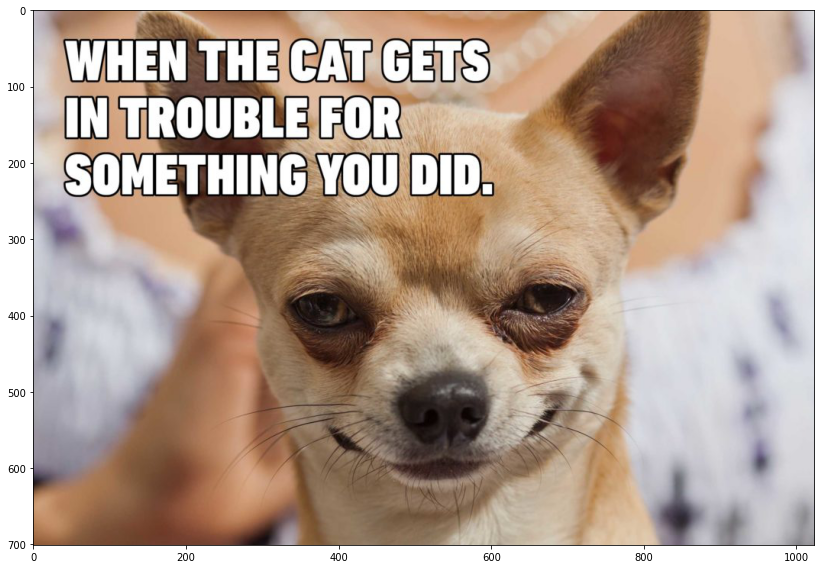

In [ ]:
plt.figure(figsize=(14,14)) 
predicted_label,image = PretrainedResNet(path)#+'/01392.png') 
plt.imshow(image) 
print(predicted_label)

In [ ]:
ocr="when the cat gets in trouble for something you did"
x_test=[]
x_test.append(ocr+"."+predicted_label)
x_test=np.array(x_test)
x_test_tokenized = x_tokenizer.texts_to_sequences(x_test)
x_testing = sequence.pad_sequences(x_test_tokenized, maxlen=max_text_length)
print(model.predict(x_testing)[0][0])
print(0 if model.predict(x_testing)[0][0]<0.5 else 1)

0.42189392
0


A Small Dog Is Sitting On A Couch With A Remote . 


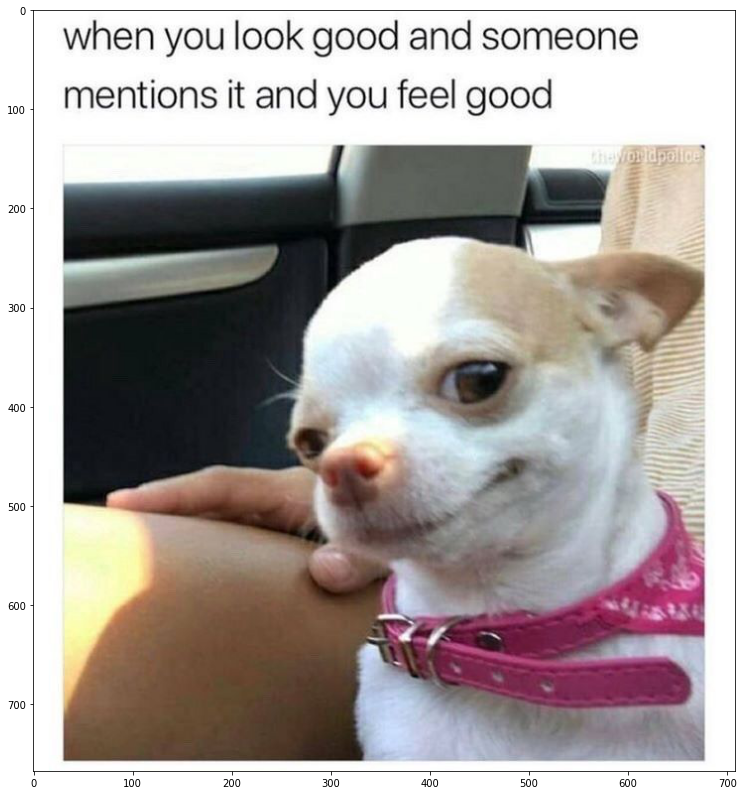

In [ ]:
plt.figure(figsize=(14,14)) 
predicted_label,image = PretrainedResNet("/content/4f6e4542de9c4bbfd9e69b560393444b.jpg")
plt.imshow(image) 
print(predicted_label)

In [ ]:
ocr2=pytesseract.image_to_string(Image.open('/content/4f6e4542de9c4bbfd9e69b560393444b.jpg'))

In [ ]:
print(ocr2)

when you look good and someone
mentions it and you feel good

 



In [ ]:
x_test=[]
x_test.append(ocr2+"."+predicted_label)
x_test=np.array(x_test)
x_test_tokenized = x_tokenizer.texts_to_sequences(x_test)
x_testing = sequence.pad_sequences(x_test_tokenized, maxlen=max_text_length)
print(model.predict(x_testing)[0][0])
print(0 if model.predict(x_testing)[0][0]<0.5 else 1)

0.4404914
0


In [ ]:
import pickle

In [ ]:
with open('/content/drive/My Drive/Colab Notebooks/Memes Project/Project-20201030T073607Z-001.zip (Unzipped Files)/dict2000.txt', 'rb') as handle:
  b = pickle.loads(handle.read())

In [ ]:
b

{'23058.png': 'A Man In A Suit And Tie With A Tie . ',
 '13894.png': 'A Black Cat Is Sitting On A Couch . ',
 '37408.png': 'A Black Dog With A Red Collar Sitting On A Couch . ',
 '82403.png': 'A Man In A Suit And Tie Standing In Front Of A Building . ',
 '16952.png': 'A Man Is Holding A Tennis Racket In His Hand . ',
 '76932.png': 'A Man Is Holding A Baby In A Brown Horse . ',
 '70914.png': 'A Woman Wearing A Red Shirt And A Tie . ',
 '02973.png': 'A Black Dog With A Red Collar Sitting On A Couch . ',
 '79351.png': 'A Man Wearing A Suit And Tie With A Tie . ',
 '34096.png': 'A Table With A Bunch Of Different Types Of Scissors . ',
 '25489.png': 'A Man Wearing A Hat And A Tie . ',
 '19324.png': 'A Man Sitting On A Couch With A Cat On His Lap . ',
 '79346.png': 'A Woman Wearing A Red Shirt And A Tie . ',
 '13426.png': 'A Person Holding A Colorful Umbrella In Front Of A Crowd . ',
 '97628.png': 'A Young Boy Is Sitting On A Couch With A Remote Controller . ',
 '14238.png': 'A Man Wearing A

In [1]:
import json

In [2]:
def load_jsonl(input_path) -> list:
    data = []
    with open(input_path, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line.rstrip('\n|\r')))
    print('Loaded {} records from {}'.format(len(data), input_path))
    return data

In [6]:
import pandas as pd
webpage_data = load_jsonl('/content/test.jsonl')
db_data = []
db_cols = ['id', 'img', 'text']
for d in webpage_data:
    db_data.append([])
    for col in db_cols:
        db_data[-1].append(d.get(col, float('nan')))
df = pd.DataFrame(db_data, columns=db_cols)

Loaded 1000 records from /content/test.jsonl


In [7]:
df.head(20)

,id,img,text
0,16395,img/16395.png,handjobs sold seperately
1,37405,img/37405.png,introducing fidget spinner for women
2,94180,img/94180.png,happy pride month let's go beat up lesbians
3,54321,img/54321.png,laughs in [majority of u.s crime rate]
4,97015,img/97015.png,finds out those 72 virgins.. are goats
5,73506,img/73506.png,look your dad fucked goats.. i capped him...so...
6,5429,img/05429.png,claims that her ancestors created a safe space...
7,70691,img/70691.png,overdose
8,69421,img/69421.png,when they laugh about your 9cm in the change r...
9,50162,img/50162.png,"roses are black, violets are black everything ..."


In [8]:
dict=df.set_index('img')['text'].to_dict()

In [9]:
l=list(dict.keys())

In [ ]:
path="/content/data"

In [10]:
i=0
for file in l:
  i=i+1
  print(i)  
  print(file)
  img=Image.open(path+"/"+file)
  img=np.array(img)
  print(img.shape)
  predicted_label= PretrainedResNet(path+"/"+file)
  print(i,end=",")
  x_test=[]
  x_test.append(dict[file]+"."+predicted_label)
  x_test=np.array(x_test)
  x_test_tokenized = x_tokenizer.texts_to_sequences(x_test)
  x_testing = sequence.pad_sequences(x_test_tokenized, maxlen=max_text_length)
  prob.append(model.predict(x_testing)[0][0])

1
img/16395.png


NameError: ignored

In [ ]:
arr = df["id"].to_numpy()
label=[0 if i<0.5 else 1 for i in prob]
#label

In [ ]:
dataset=zip(arr,prob,label)

In [ ]:
import csv
with open("/content/drive/My Drive/Colab Notebooks/Memes Project/submission__1.csv", "w") as f:
    writer = csv.writer(f)
    for row in dataset:
        writer.writerow(row)